## Importing the NMIST dataset

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
NR_CLASSES = 10
import matplotlib.pyplot as plt
from PIL import Image


Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() #Load the dataset

### Explore the data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

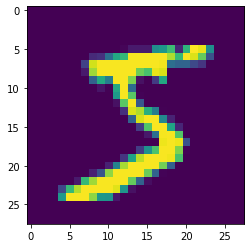

In [7]:
# Plot First image
plt.imshow(X_train[0])

## Data pre-processing and scaling

In [8]:
##Reshape training data to fit into our model
X_train = X_train.reshape(60000,28,28,1) #No.of samples,Img height,Image width,Channels for grayscale
X_test = X_test.reshape(10000,28,28,1)

In [9]:
X_train.shape
X_test.shape

(10000, 28, 28, 1)

### One hot encode target variable

In [10]:
## Convert the labels categorical variables in a matrix such that
##if the output category is digit 5 ..1 will be in 6th position of array

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [11]:
y_train
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [12]:
y_train.shape
y_test.shape

(10000, 10)

### Normalize pixel values between 0 and 1

In [13]:
## Re-scaling all pixels to have values between 0 an 1 (Normalize)
X_train = X_train/255
X_test = X_test/255

## Neural Network Architecture

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [15]:
# Initializing CNN
classifier = Sequential()

In [16]:
# Step 1: Convolution
classifier.add(Conv2D(64,kernel_size=3,input_shape=(28,28,1),activation = 'relu'))
# 64 is the number of nodes/filters in Convolution layer
# Input shape is (Img height, Img width and channels)
# kernel size is 3 for filter size of 3x3 filter matrix
#Activation function used is Rectifier ReLU for non-linearity


In [17]:
#Step 2: Max Pooling (reduce Dimensionality and retain spatial variance)
classifier.add(MaxPooling2D(pool_size=(2,2)))


In [18]:
#Adding Second Convolution layer
classifier.add(Conv2D(32,kernel_size =3, activation= 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


In [19]:
#Step 3: Flatten
classifier.add(Flatten())


In [20]:
# Step 4: Add Hidden layer (Full Connection)
classifier.add(Dense(NR_CLASSES,activation='softmax'))

In [21]:
# Compiling CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # C;assify into categorical labels

In [22]:
# Fit CNN model
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1000, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 48s - loss: 1.0128 - accuracy: 0.7255 - val_loss: 0.2899 - val_accuracy: 0.9152
Epoch 2/50
 - 51s - loss: 0.2187 - accuracy: 0.9362 - val_loss: 0.1474 - val_accuracy: 0.9565
Epoch 3/50
 - 59s - loss: 0.1296 - accuracy: 0.9628 - val_loss: 0.0980 - val_accuracy: 0.9707
Epoch 4/50
 - 63s - loss: 0.0953 - accuracy: 0.9721 - val_loss: 0.0718 - val_accuracy: 0.9779
Epoch 5/50
 - 63s - loss: 0.0815 - accuracy: 0.9759 - val_loss: 0.0670 - val_accuracy: 0.9784
Epoch 6/50
 - 61s - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0539 - val_accuracy: 0.9836
Epoch 7/50
 - 61s - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0532 - val_accuracy: 0.9838
Epoch 8/50
 - 62s - loss: 0.0563 - accuracy: 0.9834 - val_loss: 0.0497 - val_accuracy: 0.9845
Epoch 9/50
 - 61s - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0482 - val_accuracy: 0.9836
Epoch 10/50
 - 62s - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0478 - val_accuracy: 0.9858
Epoch 11

## Model Prection and evaluation


In [27]:
prediction = classifier.predict((X_test[:4]))
prediction

array([[3.60204379e-12, 7.48092477e-10, 3.80004028e-09, 2.30409380e-09,
        7.21797178e-15, 3.67386853e-14, 2.50645209e-24, 1.00000000e+00,
        1.54909852e-12, 1.04487112e-08],
       [6.66703637e-10, 3.11344071e-12, 1.00000000e+00, 2.86803757e-13,
        3.28259823e-18, 1.96243327e-18, 5.59632118e-10, 5.16877292e-15,
        1.11687426e-09, 1.33826454e-16],
       [7.14769355e-10, 9.99971271e-01, 5.70232771e-07, 4.00849881e-10,
        1.73934222e-05, 2.13259699e-09, 1.24654065e-09, 3.60595868e-06,
        7.19745049e-06, 1.70301426e-08],
       [9.99990106e-01, 1.83420366e-16, 4.84665502e-11, 2.33581236e-15,
        1.13301685e-14, 6.14155211e-13, 9.84750841e-06, 5.42950788e-11,
        3.59477587e-11, 5.90096071e-12]], dtype=float32)

In [28]:
#Print predictions
classes = np.argmax(prediction,axis=1)
print('The prediction by model  for first 4 images are', classes)

The prediction by model  for first 4 images are [7 2 1 0]


In [29]:
## Verify the actual images
verify_img = y_test[:4]
verify_img

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
print('The digits to test first 4 are 7,2,1,0')

The digits to test first 4 are 7,2,1,0


In [32]:
scores = classifier.evaluate(X_test,y_test,verbose=0)
scores

[0.04100977505862575, 0.9889000058174133]

In [76]:
##Testing a new Image
img = Image.open('D:/Data/Downloads/2.jpg')
img

In [77]:
bw = img.convert('L') #Convert color image to grey scale image
bw

In [78]:
img_array = np.invert(bw) #Covert bw image to ndarray
img_array.shape

(28, 28)

In [79]:
img_array = img_array.reshape(1,28,28,1)
img_array.shape

(1, 28, 28, 1)

In [80]:
new_pred = classifier.predict(img_array)
np.argmax(new_pred)

2